### PROBLEM 01

In [18]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import seaborn as sns

In [5]:
#importing the dataset
Startups1=pd.read_csv("C:\\Users\\PRIYANKA\\Downloads\\50_Startups.csv")
Startups1.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### EDA

In [6]:
Startups1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [22]:
Startups2=Startups1.rename({'R&D Spend':'RD','Marketing Spend':'MARKETING','Administration':'ADMINISTRATION','State':'STATE','Profit':'PROFIT'},axis=1)
Startups2.head(5)

,RD,ADMINISTRATION,MARKETING,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
Startups2.describe()

,RD,ADMINISTRATION,MARKETING,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [24]:
Startups2[Startups2.duplicated()]

,RD,ADMINISTRATION,MARKETING,STATE,PROFIT


### CORRELATION ANALYSIS

In [25]:
Startups2.corr()

,RD,ADMINISTRATION,MARKETING,PROFIT
RD,1.000000,0.241955,0.724248,0.972900
ADMINISTRATION,0.241955,1.000000,-0.032154,0.200717
MARKETING,0.724248,-0.032154,1.000000,0.747766
PROFIT,0.972900,0.200717,0.747766,1.000000


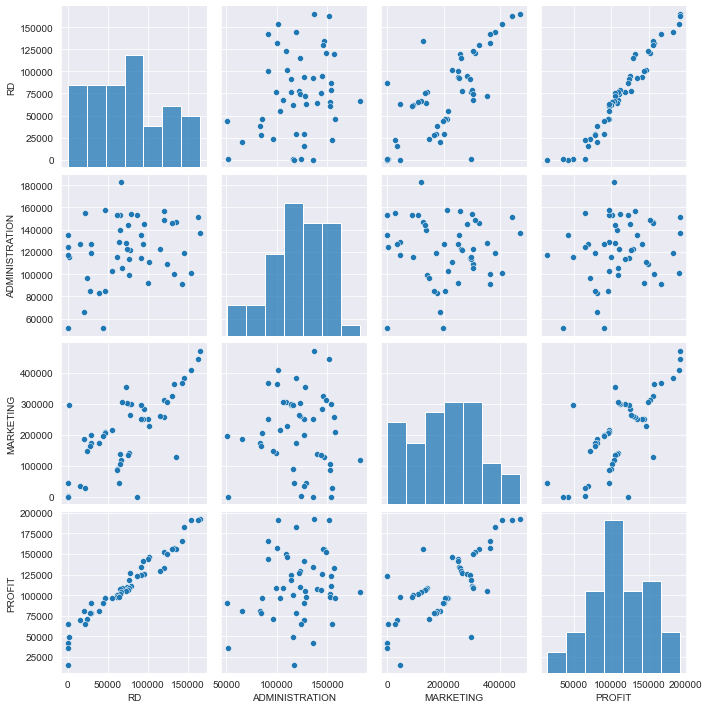

In [26]:
sns.set_style(style='darkgrid')
sns.pairplot(Startups2)

### MODEL BUILDING

In [29]:
model=smf.ols('PROFIT~RD+ADMINISTRATION+MARKETING',data=Startups2).fit()

In [31]:
#finding coefficients parameters
model.params

Intercept         50122.192990
RD                    0.805715
ADMINISTRATION       -0.026816
MARKETING             0.027228
dtype: float64

In [32]:
#finding t values,pvalues,rsquare values ,rsquare_adj values

In [45]:
model.tvalues
print('THE T VALUES FOR THE STARTUPS IS:','\n',model.tvalues)
np.round(model.pvalues,4)
print('\n','THE P VALUES FOR THE STARTUPS IS:','\n',np.round(model.pvalues,4))
model.rsquared
print('\n','THE R SQUARED VALUES FOR THE STARTUPS IS:','\n',model.rsquared)
model.rsquared_adj
print('\n','THE R SQUARED ADJ VALUES FOR THE STARTUPS IS:','\n',model.rsquared_adj)

THE T VALUES FOR THE STARTUPS IS: 
 Intercept          7.626218
RD                17.846374
ADMINISTRATION    -0.525507
MARKETING          1.655077
dtype: float64

 THE P VALUES FOR THE STARTUPS IS: 
 Intercept         0.0000
RD                0.0000
ADMINISTRATION    0.6018
MARKETING         0.1047
dtype: float64

 THE R SQUARED VALUES FOR THE STARTUPS IS: 
 0.9507459940683246

 THE R SQUARED ADJ VALUES FOR THE STARTUPS IS: 
 0.9475337762901719


In [44]:
# Building SLR and MLR models for insignificant variables 'CC' and 'Doors'
# Also find their tvalues and pvalues

In [52]:
slr_ADMINISTRATION=smf.ols("PROFIT~ADMINISTRATION",data=Startups2).fit()
slr_ADMINISTRATION.tvalues,slr_ADMINISTRATION.pvalues

(Intercept         3.040044
 ADMINISTRATION    1.419493
 dtype: float64,
 Intercept         0.003824
 ADMINISTRATION    0.162217
 dtype: float64)

In [53]:
slr_MARKETING=smf.ols("PROFIT~MARKETING",data=Startups2).fit()
slr_MARKETING.tvalues,slr_MARKETING.pvalues

(Intercept    7.808356
 MARKETING    7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MARKETING    4.381073e-10
 dtype: float64)

In [54]:
mlr_adm_mar=smf.ols("PROFIT~ADMINISTRATION+MARKETING",data=Startups2).fit()
mlr_adm_mar.tvalues,mlr_adm_mar.pvalues

(Intercept         1.142741
 ADMINISTRATION    2.467779
 MARKETING         8.281039
 dtype: float64,
 Intercept         2.589341e-01
 ADMINISTRATION    1.729198e-02
 MARKETING         9.727245e-11
 dtype: float64)

### MODEL VALIDATION

2 TECHNIQUES:

1.COLLINEARITY CHECK

2.RESIDUAL ANALYSIS

In [61]:
#PERFORMING COLLINEARITY CHECK
#CALUCULATING VIF VALUES FOR ALL THE INDEPENDENT VALUES

rsq_rd=smf.ols("RD~ADMINISTRATION+MARKETING",data=Startups2).fit().rsquared
vif_rd=1/(1-rsq_rd)
rsq_ad=smf.ols("ADMINISTRATION~RD+MARKETING",data=Startups2).fit().rsquared
vif_ad=1/(1-rsq_ad)
rsq_ma=smf.ols("MARKETING~ADMINISTRATION+RD",data=Startups2).fit().rsquared
vif_ma=1/(1-rsq_ma)

Startups_collinearity_check={'VARIABLES':['RD','ADMINISTRATION','MARKETING'],'VIF VALUES':[vif_rd,vif_ad,vif_ma]}
VIF_Startups_collinearity_check=pd.DataFrame(Startups_collinearity_check)
VIF_Startups_collinearity_check

,VARIABLES,VIF VALUES
0,RD,2.468903
1,ADMINISTRATION,1.175091
2,MARKETING,2.326773


In [64]:
# Here none of the variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

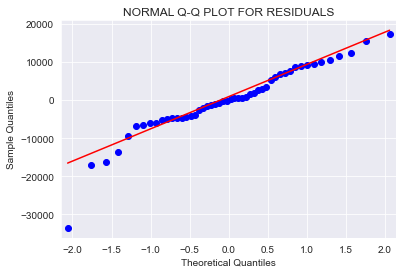

In [65]:
#PERFORMING RESIDUAL ANALYSIS
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)


sm.qqplot(model.resid,line='q')
plt.title("NORMAL Q-Q PLOT FOR RESIDUALS")
plt.show()
import warnings
warnings.filterwarnings("ignore")

In [69]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [70]:
Startups2

,RD,ADMINISTRATION,MARKETING,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### TSET FOR HOMOSCADASTICITY OR HETEROSCADASTICITY
#(plotting model's standardized fitted values vs standardized residual values)


In [71]:
def standard_values(vals):
    return(vals-vals.mean())/vals.std()

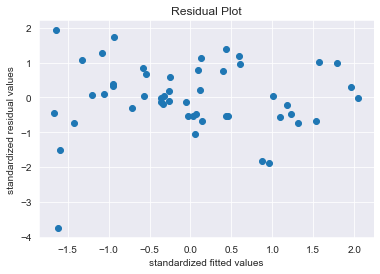

In [72]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


In [ ]:
#RESIDUAL VS REGRESSORS

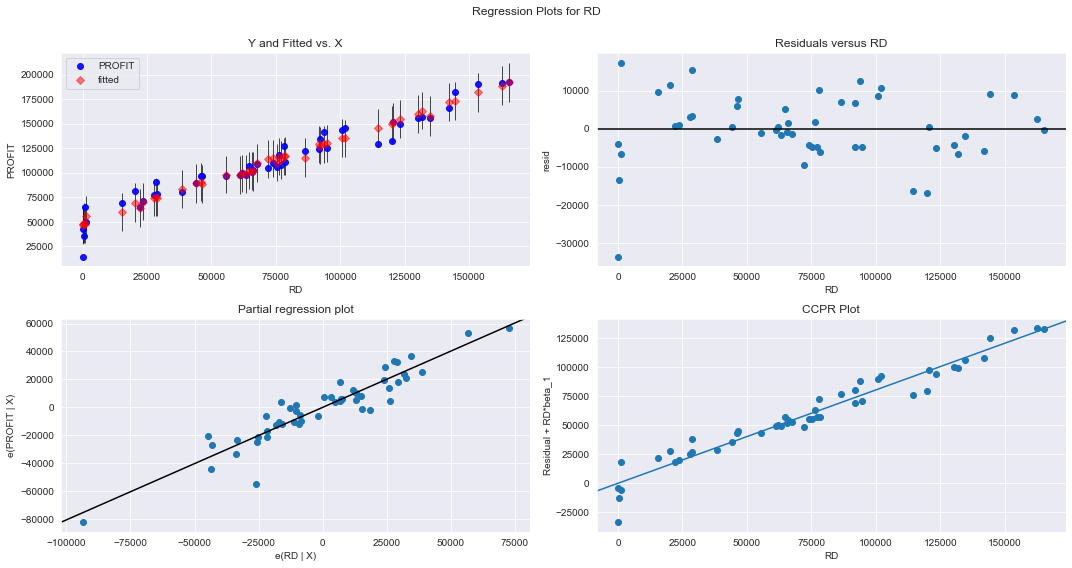

In [73]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

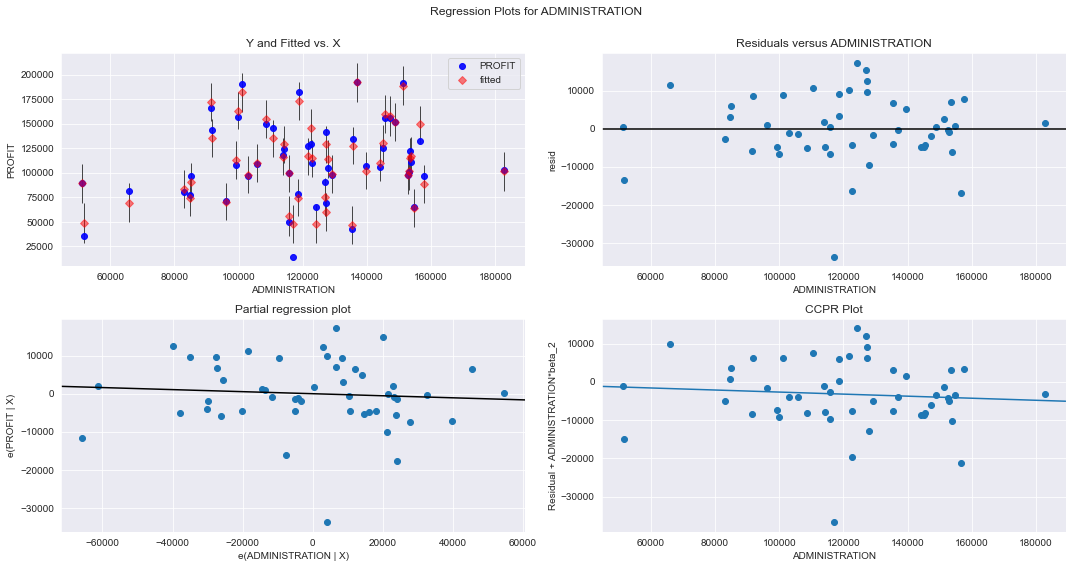

In [74]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMINISTRATION',fig=fig)
plt.show()

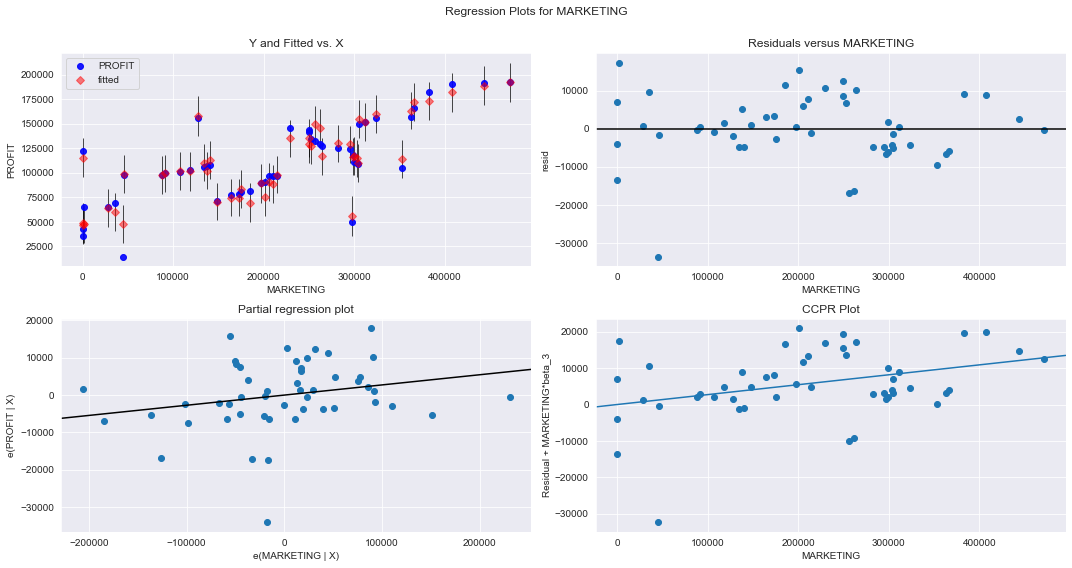

In [75]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MARKETING',fig=fig)
plt.show()

In [77]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

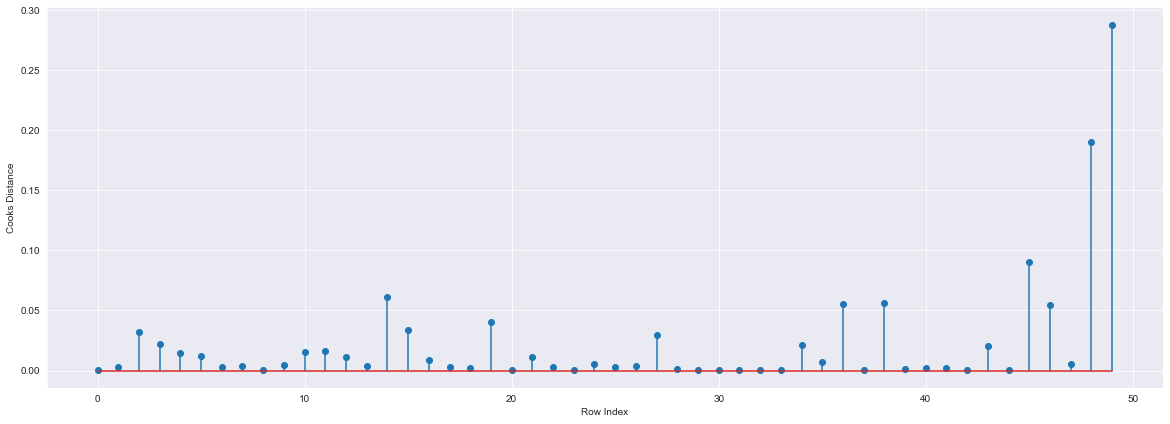

In [78]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(Startups2)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [79]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543263)

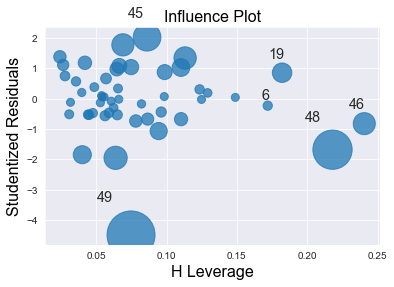

In [80]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()


In [82]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=Startups2.shape[1]
n=Startups2.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [83]:
Startups2[Startups2.index.isin([49])] 

,RD,ADMINISTRATION,MARKETING,STATE,PROFIT
49,0.0,116983.8,45173.06,California,14681.4


### IMPROVING THE MODEL

In [84]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Startups3=Startups2.drop(Startups2.index[[49]],axis=0).reset_index(drop=True)
Startups3

,RD,ADMINISTRATION,MARKETING,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### MODEL DELETION AND DIAGNOSTICS

In [86]:
model2=smf.ols("PROFIT~RD+ADMINISTRATION+MARKETING",data=Startups3).fit()


In [87]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("PROFIT~RD+ADMINISTRATION+MARKETING",data=Startups3).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Startups3=Startups3.drop(Startups3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Startups3
    else:
        final_model=smf.ols("PROFIT~RD+ADMINISTRATION+MARKETING",data=Startups3).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779906
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090915
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.98771919355472
Thus model accuracy is improved 

In [88]:
final_model.rsquared

0.9882757054424702

In [89]:
Startups3

,RD,ADMINISTRATION,MARKETING,STATE,PROFIT
0,142107.34,91391.77,366168.42,Florida,166187.94
1,131876.90,99814.71,362861.36,New York,156991.12
2,130298.13,145530.06,323876.68,Florida,155752.60
3,120542.52,148718.95,311613.29,New York,152211.77
4,123334.88,108679.17,304981.62,California,149759.96
5,91992.39,135495.07,252664.93,California,134307.35
6,94657.16,145077.58,282574.31,New York,125370.37
7,91749.16,114175.79,294919.57,Florida,124266.90
8,76253.86,113867.30,298664.47,California,118474.03
9,67532.53,105751.03,304768.73,Florida,108733.99


### MODEL PREDICTION

In [95]:
# Assume New data for prediction is
new_data=pd.DataFrame({'RD':80000,"ADMINISTRATION":90000,"MARKETING":100000},index=[0])
new_data

,RD,ADMINISTRATION,MARKETING
0,80000,90000,100000


In [96]:
final_model.predict(new_data)

0    109907.037606
dtype: float64

In [98]:
pred_y=final_model.predict(Startups3)
pred_y

0     165589.539700
1     158552.826483
2     156789.000710
3     149524.698853
4     150122.356712
5     126598.769555
6     130104.785747
7     127878.387928
8     117298.757074
9     111329.242429
10    110009.916133
11    102331.717613
12    109661.804131
13    103462.767086
14    101874.612012
15     97655.794577
16     97872.919535
17     96858.382686
18     98654.449007
19     93583.600868
20     91186.568204
21     88571.938968
22     84521.312916
23     78528.002935
24     76670.262623
25     73237.524757
26     68075.710756
dtype: float64

### TABLE CONTAINING VALUES OF GIVEN MODEL AND FINAL MODEL AND THEIR R^2 VALUES

In [99]:
df={'PREPARED MODELS':['Model','Final_Model'],'RSQUARED':[model.rsquared,final_model.rsquared]}
OUTPUT=pd.DataFrame(df)
OUTPUT




,PREPARED MODELS,RSQUARED
0,Model,0.950746
1,Final_Model,0.988276


### Hence the prediction model for profit of 50_startups data is performed.

### PROBLEM 02

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot

In [108]:
Toyota1=pd.read_excel("C:\\Users\\PRIYANKA\\Downloads\\Toyota.xlsx")
Toyota1.head(5)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90.0,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90.0,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90.0,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90.0,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90.0,0,...,1,1,1,0,1,0,1,0,0,0


### EDA

In [110]:
Toyota1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                1436 non-null   int64  
 1   Model             1436 non-null   object 
 2   Price             1436 non-null   int64  
 3   Age_08_04         1436 non-null   int64  
 4   Mfg_Month         1436 non-null   int64  
 5   Mfg_Year          1436 non-null   int64  
 6   KM                1436 non-null   int64  
 7   Fuel_Type         1436 non-null   object 
 8   HP                1434 non-null   float64
 9   Met_Color         1436 non-null   int64  
 10  Color             1436 non-null   object 
 11  Automatic         1436 non-null   int64  
 12  cc                1436 non-null   int64  
 13  Doors             1436 non-null   int64  
 14  Cylinders         1436 non-null   int64  
 15  Gears             1436 non-null   int64  
 16  Quarterly_Tax     1436 non-null   int64  


In [121]:
Toyota2=pd.concat([Toyota1.iloc[:,2:4],Toyota1.iloc[:,6:7],Toyota1.iloc[:,8:9],Toyota1.iloc[:,12:14],Toyota1.iloc[:,15:18]],axis=1)

In [122]:
Toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [219]:
Toyota3=Toyota2.rename({'Price':'PRICE','Age_08_04':'AGE','cc':'CC','Doors':'DOORS','Gears':'GEARS','Quarterly_Tax':'QT','Weight':"WEIGHT"},axis=1)

In [220]:
Toyota3

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86.0,1300,3,5,69,1025
1432,10845,72,19000,86.0,1300,3,5,69,1015
1433,8500,71,17016,86.0,1300,3,5,69,1015
1434,7250,70,16916,86.0,1300,3,5,69,1015


In [221]:
Toyota3.describe()

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
count,1436.000000,1436.000000,1436.000000,1434.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.513250,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.987975,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [222]:
Toyota3[Toyota3.duplicated()]

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
113,24950,8,13253,116.0,2000,5,5,234,1320


In [223]:
Toyota4=Toyota3.drop_duplicates().reset_index(drop=True)
Toyota4

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86.0,1300,3,5,69,1025
1431,10845,72,19000,86.0,1300,3,5,69,1015
1432,8500,71,17016,86.0,1300,3,5,69,1015
1433,7250,70,16916,86.0,1300,3,5,69,1015


In [224]:
Toyota4.describe()

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
count,1435.000000,1435.000000,1435.000000,1433.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.503140,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.988316,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


### CORRELATION

In [225]:
Toyota4.corr()

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
PRICE,1.000000,-0.876273,-0.569420,0.316412,0.124375,0.183604,0.063831,0.211508,0.575869
AGE,-0.876273,1.000000,0.504575,-0.156549,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.333279,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.316412,-0.156549,-0.333279,1.000000,0.035677,0.091091,0.209590,-0.301712,0.089396
CC,0.124375,-0.096549,0.103822,0.035677,1.000000,0.079254,0.014732,0.305982,0.335077
DOORS,0.183604,-0.146929,-0.035193,0.091091,0.079254,1.000000,-0.160101,0.107353,0.301734
GEARS,0.063831,-0.005629,0.014890,0.209590,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.301712,0.305982,0.107353,-0.005125,1.000000,0.621988
WEIGHT,0.575869,-0.466484,-0.023969,0.089396,0.335077,0.301734,0.021238,0.621988,1.000000


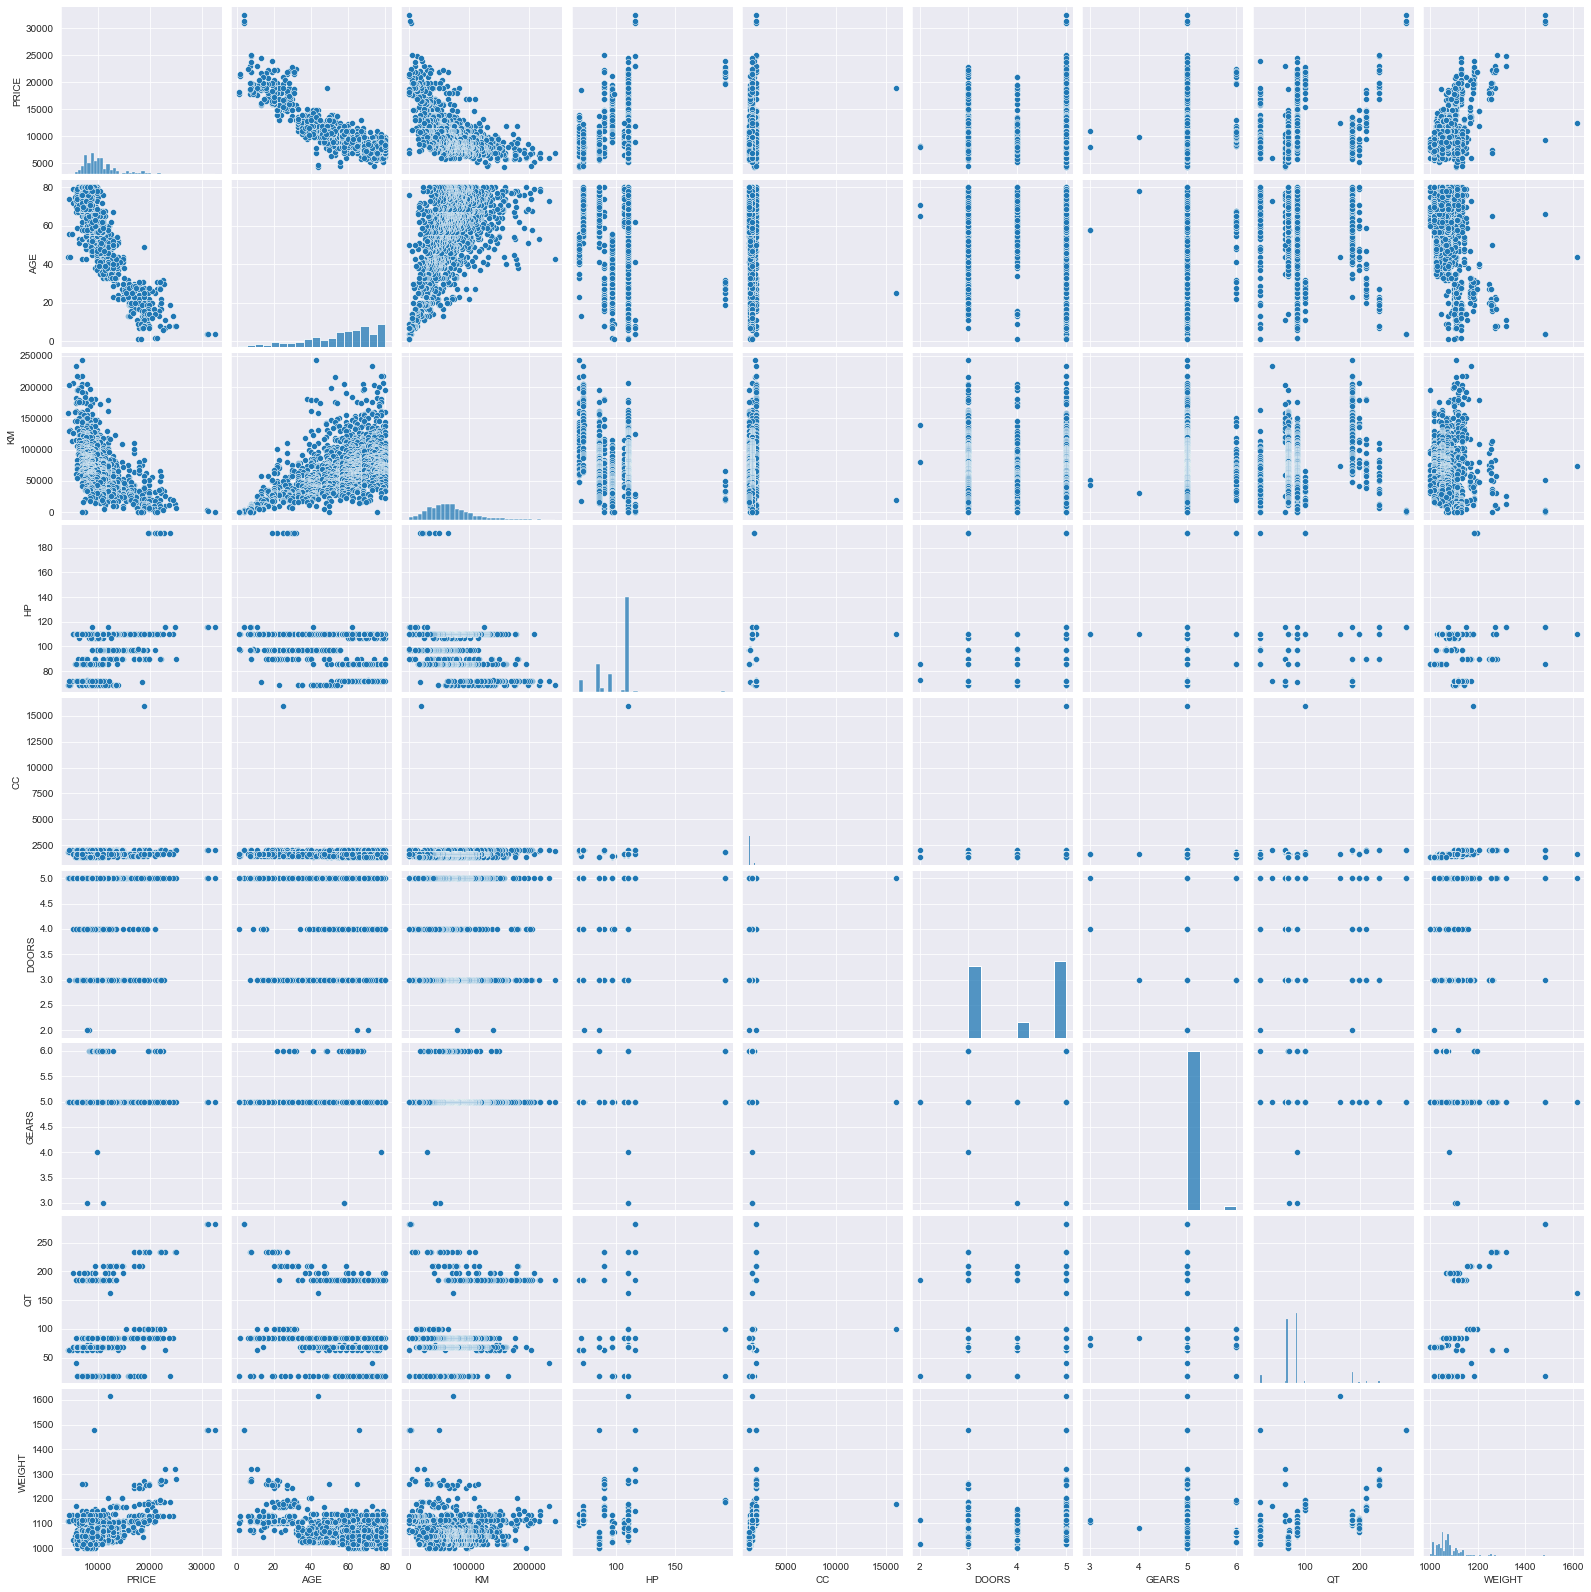

In [226]:
sns.set_style(style='darkgrid')
sns.pairplot(Toyota4)

### MODEL BUILDING

In [227]:
model=smf.ols('PRICE~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT',data=Toyota4).fit()

In [228]:
model.params

Intercept   -5408.896028
AGE          -121.698872
KM             -0.020712
HP             31.664670
CC             -0.117027
DOORS           3.236899
GEARS         601.694789
QT              3.832667
WEIGHT         16.749870
dtype: float64

In [229]:
model.tvalues

Intercept    -3.828972
AGE         -46.547581
KM          -16.532785
HP           11.237564
CC           -1.299556
DOORS         0.080783
GEARS         3.055055
QT            2.923987
WEIGHT       15.633974
dtype: float64

In [230]:
np.round(model.pvalues,5)

Intercept    0.00013
AGE          0.00000
KM           0.00000
HP           0.00000
CC           0.19396
DOORS        0.93563
GEARS        0.00229
QT           0.00351
WEIGHT       0.00000
dtype: float64

In [231]:
model.rsquared

0.8621154742183653

In [232]:
model.rsquared_adj

0.8613408420510528

### BUILDING SLR AND MLR

In [233]:
slr_cc=smf.ols('PRICE~CC',data=Toyota4).fit()
slr_cc.tvalues,slr_cc.pvalues

(Intercept    24.879592
 CC            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 CC            2.292856e-06
 dtype: float64)

In [234]:
slr_doors=smf.ols('PRICE~DOORS',data=Toyota4).fit()
slr_doors.tvalues,slr_doors.pvalues

(Intercept    19.421546
 DOORS         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 DOORS        2.404166e-12
 dtype: float64)

In [235]:
mlr_doors=smf.ols('PRICE~CC+DOORS',data=Toyota4).fit()
mlr_doors.tvalues,mlr_doors.pvalues

(Intercept    12.786341
 CC            4.268006
 DOORS         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 CC           2.101878e-05
 DOORS        2.109558e-11
 dtype: float64)

### MODEL VALIDATION

2 TECHNIQUES:

1.COLLINEARITY CHECK

2.RESIDUAL ANALYSIS

In [236]:
#PERFORMING COLLINEARITY CHECK
#CALUCULATING VIF VALUES FOR ALL THE INDEPENDENT VALUES

rsq_AGE=smf.ols("AGE~KM+HP+CC+DOORS+GEARS+QT+WEIGHT",data=Toyota4).fit().rsquared
vif_AGE=1/(1-rsq_AGE)
rsq_KM=smf.ols("KM~AGE+HP+CC+DOORS+GEARS+QT+WEIGHT",data=Toyota4).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols("HP~KM+AGE+CC+DOORS+GEARS+QT+WEIGHT",data=Toyota4).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_CC=smf.ols("CC~KM+AGE+HP+DOORS+GEARS+QT+WEIGHT",data=Toyota4).fit().rsquared
vif_CC=1/(1-rsq_CC)
rsq_DOORS=smf.ols("DOORS~KM+AGE+CC+HP+GEARS+QT+WEIGHT",data=Toyota4).fit().rsquared
vif_DOORS=1/(1-rsq_DOORS)
rsq_GEARS=smf.ols("GEARS~KM+AGE+CC+DOORS+HP+QT+WEIGHT",data=Toyota4).fit().rsquared
vif_GEARS=1/(1-rsq_GEARS)
rsq_QT=smf.ols("QT~KM+AGE+CC+DOORS+GEARS+HP+WEIGHT",data=Toyota4).fit().rsquared
vif_QT=1/(1-rsq_QT)
rsq_WEIGHT=smf.ols("WEIGHT~KM+AGE+CC+DOORS+GEARS+QT+HP",data=Toyota4).fit().rsquared
vif_WEIGHT=1/(1-rsq_WEIGHT)

Toyota_collinearity_check={'VARIABLES':["AGE","KM","HP","CC","DOORS","GEARS","QT","WEIGHT"],
                           'VIF VALUES':[vif_AGE,vif_KM,vif_HP,vif_CC,vif_DOORS,vif_GEARS,vif_QT,vif_WEIGHT]}
VIF_Toyota_collinearity_check=pd.DataFrame(Toyota_collinearity_check)
VIF_Toyota_collinearity_check








,VARIABLES,VIF VALUES
0,AGE,1.872029
1,KM,1.755990
2,HP,1.419154
3,CC,1.162724
4,DOORS,1.159067
5,GEARS,1.098992
6,QT,2.282157
7,WEIGHT,2.477432


In [237]:
# Here none of the variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

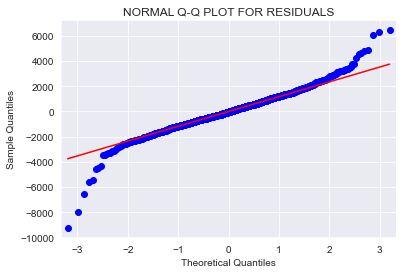

In [238]:
#PERFORMING RESIDUAL ANALYSIS
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)


sm.qqplot(model.resid,line='q')
plt.title("NORMAL Q-Q PLOT FOR RESIDUALS")
plt.show()
import warnings
warnings.filterwarnings("ignore")

In [239]:
a=list(np.where(model.resid<-6000))
b=list(np.where(model.resid>6000))
print("OUTLIERS:",a,b)

OUTLIERS: [array([218, 598, 957], dtype=int64)] [array([107, 144, 520], dtype=int64)]


In [240]:
Toyota4

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86.0,1300,3,5,69,1025
1431,10845,72,19000,86.0,1300,3,5,69,1015
1432,8500,71,17016,86.0,1300,3,5,69,1015
1433,7250,70,16916,86.0,1300,3,5,69,1015


### TEST FOR HOMOSCADASTICITY AND HETEROSCADASTICITY

In [241]:
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std()

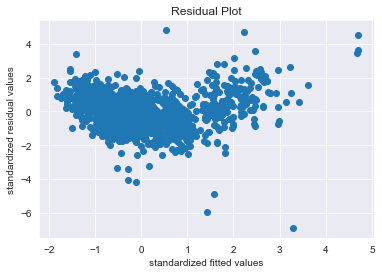

In [242]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 


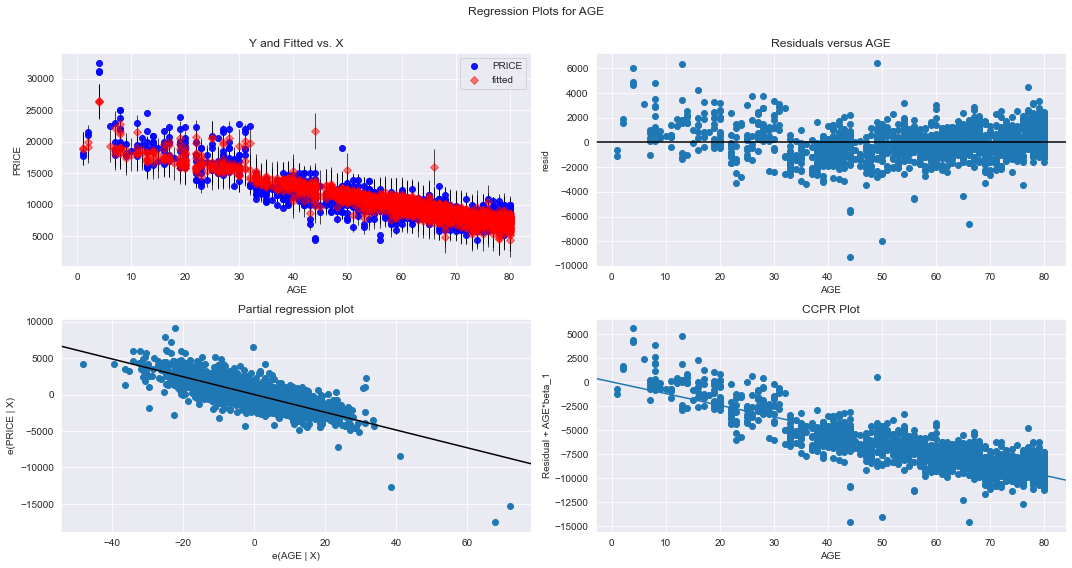

In [243]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'AGE',fig=fig)
plt.show()

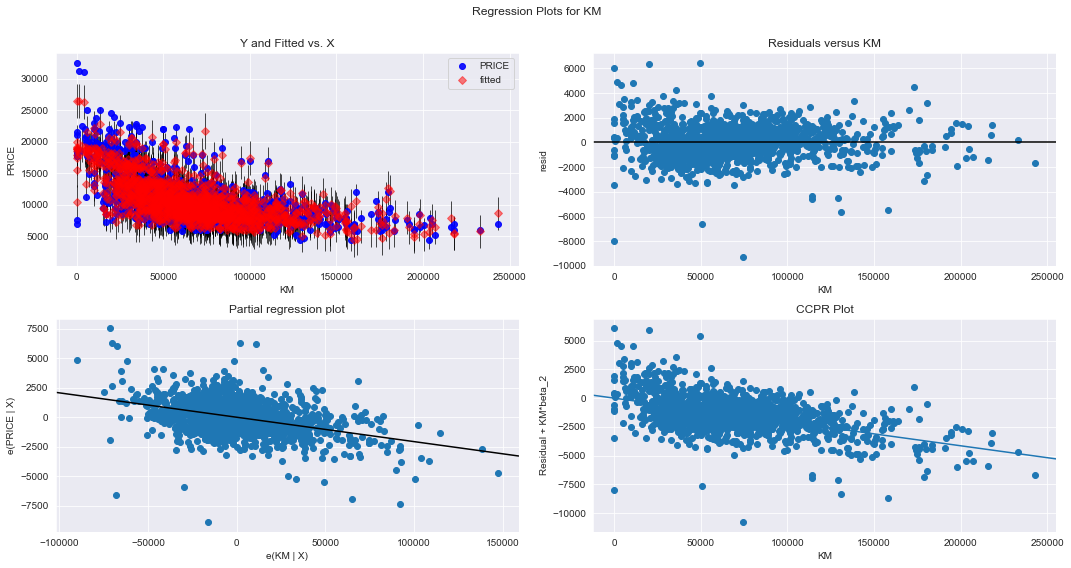

In [244]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

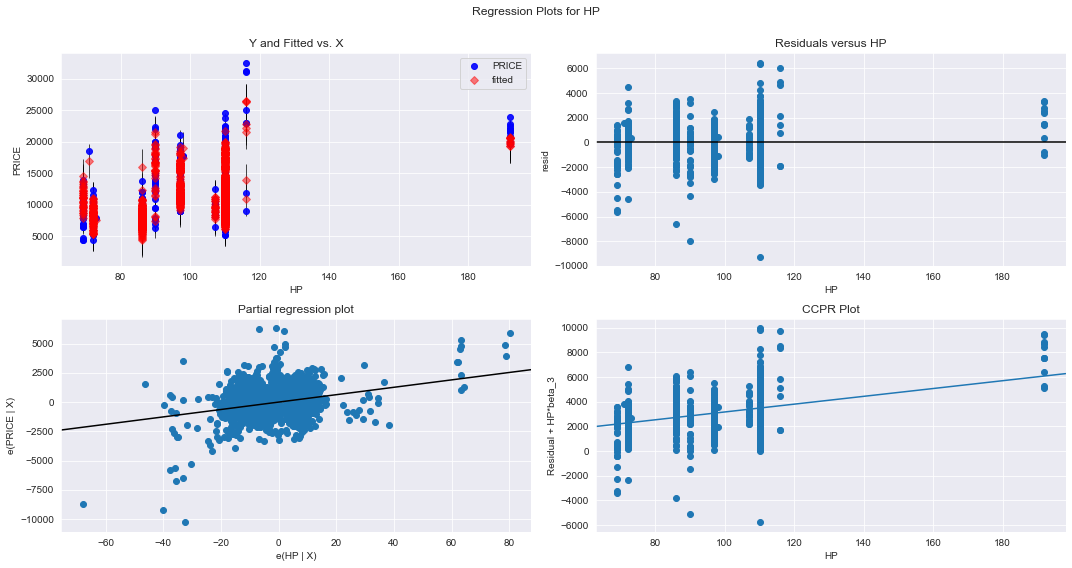

In [245]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

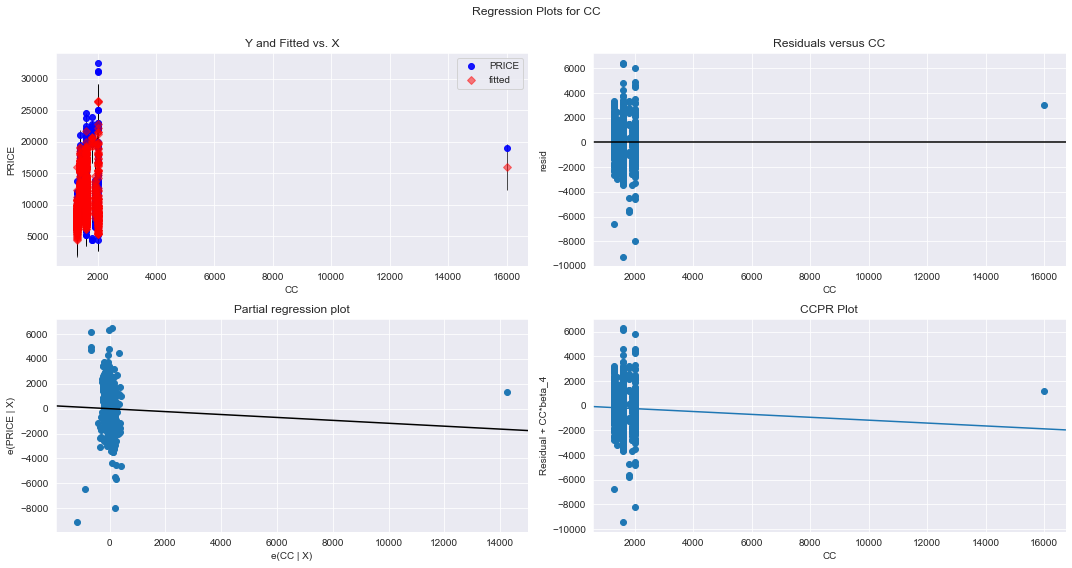

In [246]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'CC',fig=fig)
plt.show()

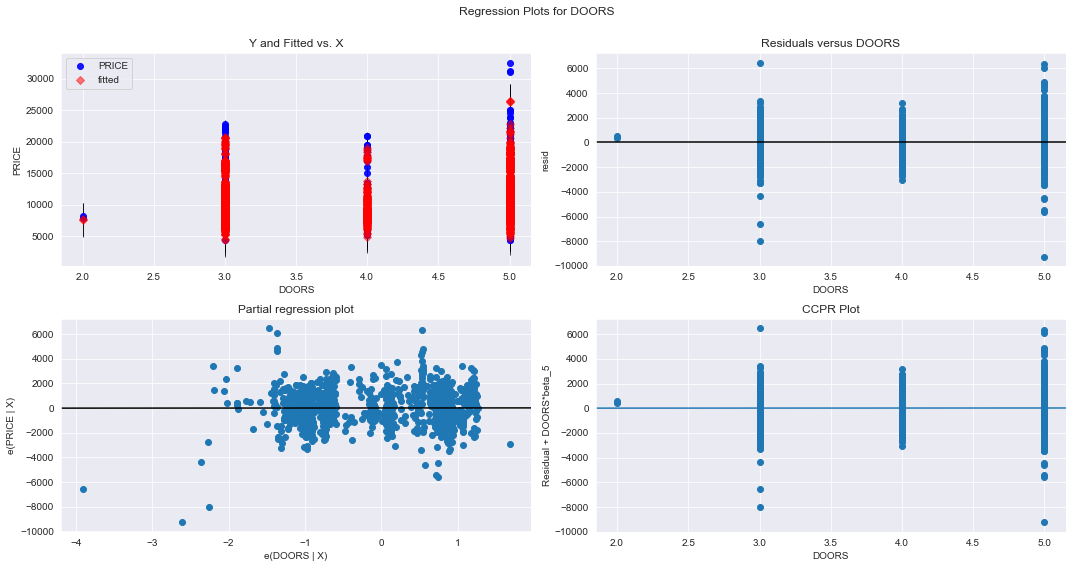

In [247]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'DOORS',fig=fig)
plt.show()

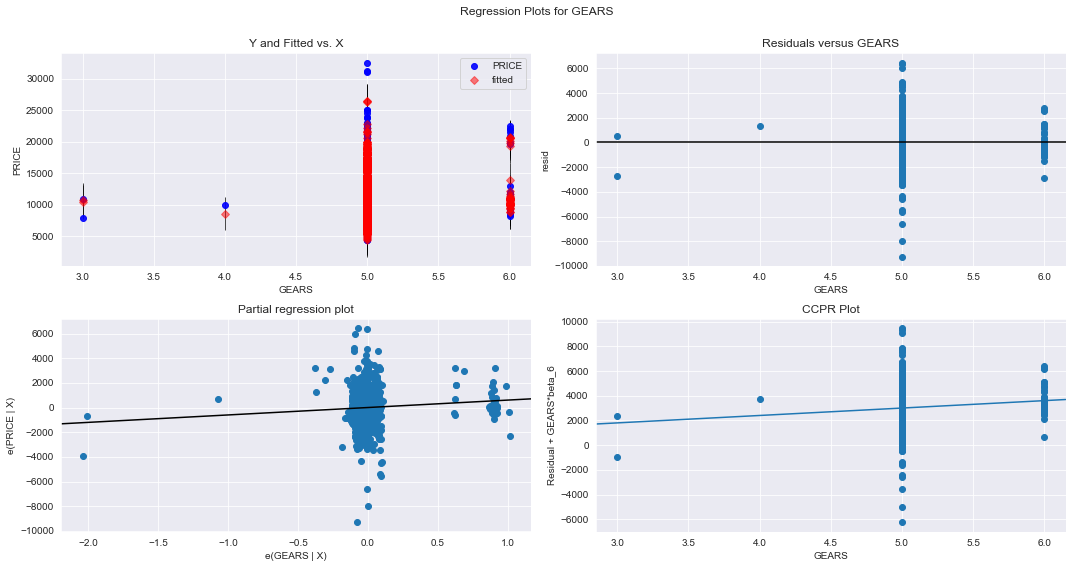

In [248]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'GEARS',fig=fig)
plt.show()

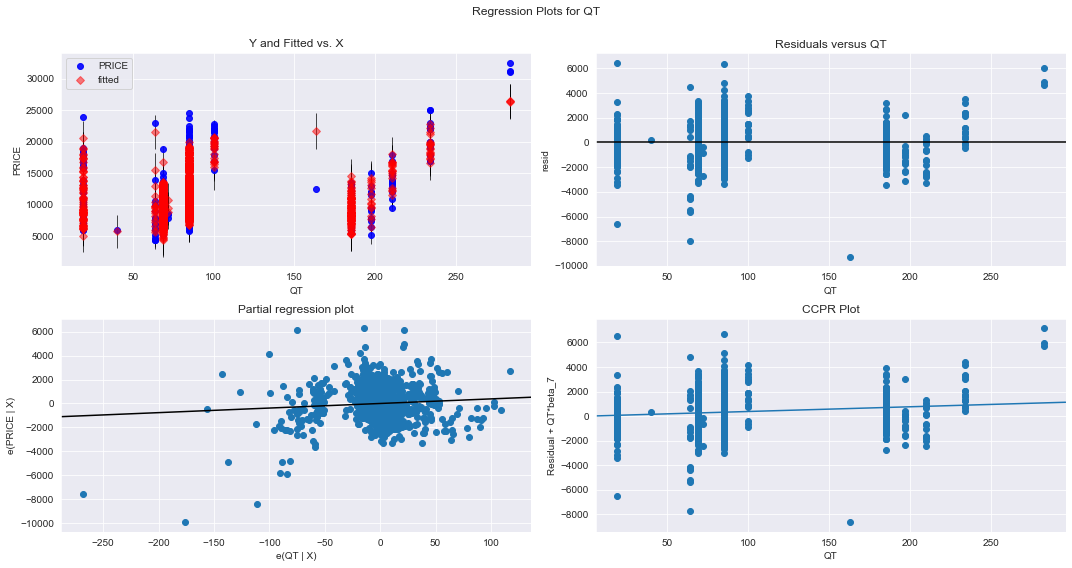

In [249]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

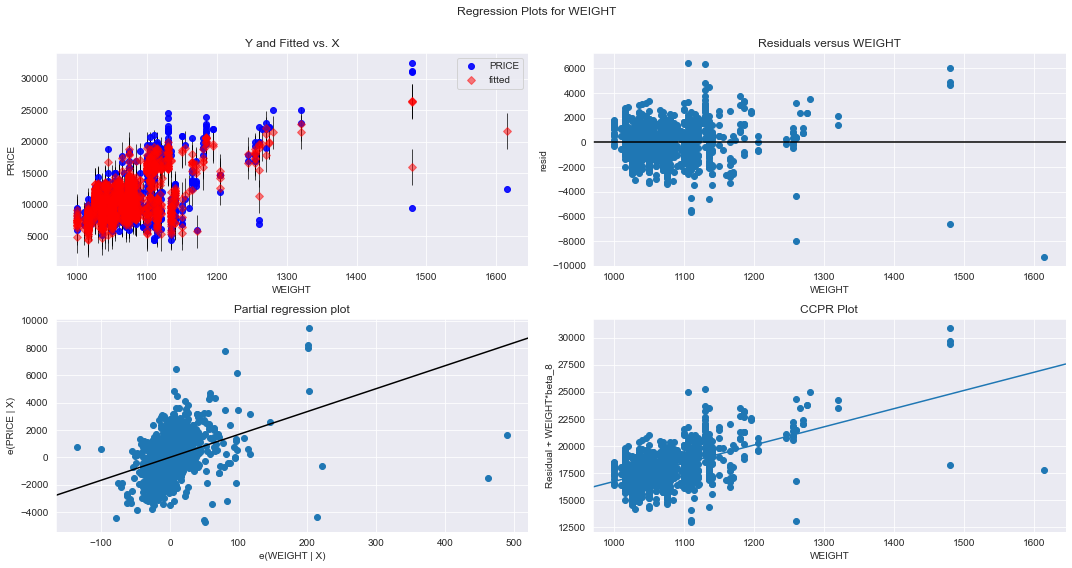

In [251]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'WEIGHT',fig=fig)
plt.show()

In [300]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.20019747e-03, 3.91974773e-03, 5.41359424e-03, ...,
       9.01816675e-07, 6.97884848e-04, 1.08368316e-02])

In [301]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(78, 78.32370087559809)

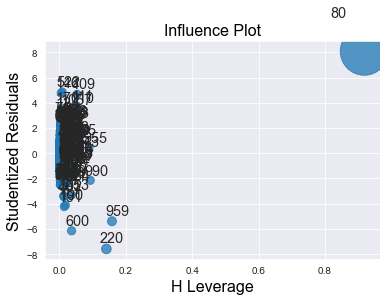

In [255]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()


In [256]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=Toyota4.shape[1]
n=Toyota4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [257]:
Toyota4[Toyota4.index.isin([80])] 

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
80,18950,25,20019,110.0,16000,5,5,100,1180


### IMPROVING THE MODEL

In [258]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
Toyota5=Toyota4.drop(Toyota4.index[[49]],axis=0).reset_index(drop=True)
Toyota5

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86.0,1300,3,5,69,1025
1430,10845,72,19000,86.0,1300,3,5,69,1015
1431,8500,71,17016,86.0,1300,3,5,69,1015
1432,7250,70,16916,86.0,1300,3,5,69,1015


### MODEL DELETION AND DIAGNOSTICS

In [264]:
model2=smf.ols("PRICE~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT",data=Toyota5).fit()


In [279]:
while np.max(c)>0.5:
        model2=smf.ols("PRICE~KM+AGE+HP+CC+DOORS+GEARS+QT+WEIGHT",data=Toyota5).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        Toyota5=Toyota5.drop(Toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        Toyota5
else:
        final_model=smf.ols("PRICE~AGE+KM+HP+CC+DOORS+GEARS+QT+WEIGHT",data=Toyota5).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8714436283636141


In [280]:
final_model.rsquared

0.8714436283636141

In [281]:
Toyota5

,PRICE,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,13500,23,46986,90.0,2000,3,5,210,1165
1,13750,23,72937,90.0,2000,3,5,210,1165
2,13950,24,41711,90.0,2000,3,5,210,1165
3,14950,26,48000,90.0,2000,3,5,210,1165
4,13750,30,38500,90.0,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1353,7500,69,20544,86.0,1300,3,5,69,1025
1354,10845,72,19000,86.0,1300,3,5,69,1015
1355,8500,71,17016,86.0,1300,3,5,69,1015
1356,7250,70,16916,86.0,1300,3,5,69,1015


### MODEL PREDICTION

In [282]:
# Assume New data for prediction is
new_data=pd.DataFrame({'AGE':50,"KM":30000,"HP":85,"CC":1500,"DOORS":4,"GEARS":5,"QT":100,"WEIGHT":1000},index=[0])
new_data

,AGE,KM,HP,CC,DOORS,GEARS,QT,WEIGHT
0,50,30000,85,1500,4,5,100,1000


In [283]:
final_model.predict(new_data)

0    9588.152722
dtype: float64

In [285]:
pred_y=final_model.predict(Toyota4)
pred_y

0       16330.956942
1       15867.941398
2       16314.784486
3       15981.999561
4       15868.385568
            ...     
1430     9248.430348
1431     8629.028484
1432     8774.715404
1433     8886.788155
1434    10792.089567
Length: 1435, dtype: float64

### TABLE CONTAINING VALUES OF GIVEN MODEL AND FINAL MODEL AND THEIR R^2 VALUES

In [286]:
df={'PREPARED MODELS':['Model','Final_Model'],'RSQUARED':[model.rsquared,final_model.rsquared]}
OUTPUT=pd.DataFrame(df)
OUTPUT




,PREPARED MODELS,RSQUARED
0,Model,0.862115
1,Final_Model,0.871444


### Hence the prediction model for price is prepared.